# Task 4 : Email Spam Detection With Machine Learning

In [2]:
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


##### Load  data

In [3]:
df = pd.read_csv('spam.csv',encoding='latin1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df['spam'] = df['v1'].apply(lambda x: 1 if x == 'spam' else 0)

In [10]:
df.head()

,v1,v2,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [11]:
df.drop(columns=['v1'],inplace=True)

([<matplotlib.patches.Wedge at 0x156795a68c0>,
 [Text(-1.0038714981945518, 0.4497132587689916, 'ham'),
  Text(1.0038714771419537, -0.44971330576360763, 'spam')])

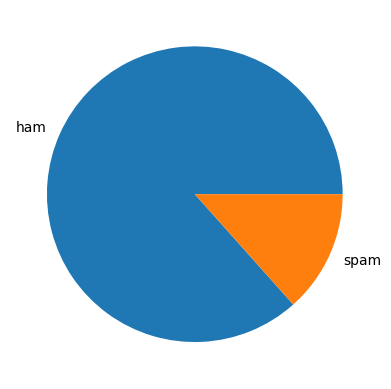

In [12]:
plt.pie(df['spam'].value_counts(),labels=['ham','spam'])

## Feature Engineering

In [13]:
import nltk

#### Number of charecters

In [14]:
df['num_charecter'] = df['v2'].apply(len)

#### Number of words

In [15]:
df['num_of_words'] = df['v2'].apply(lambda x:len(nltk.word_tokenize(x)))

#### Number of sentence

In [16]:
df['num_of_sentence'] = df['v2'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [17]:
df.head()

,v2,spam,num_charecter,num_of_words,num_of_sentence
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2
1,Ok lar... Joking wif u oni...,0,29,8,2
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2
3,U dun say so early hor... U c already then say...,0,49,13,1
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1


## EDA

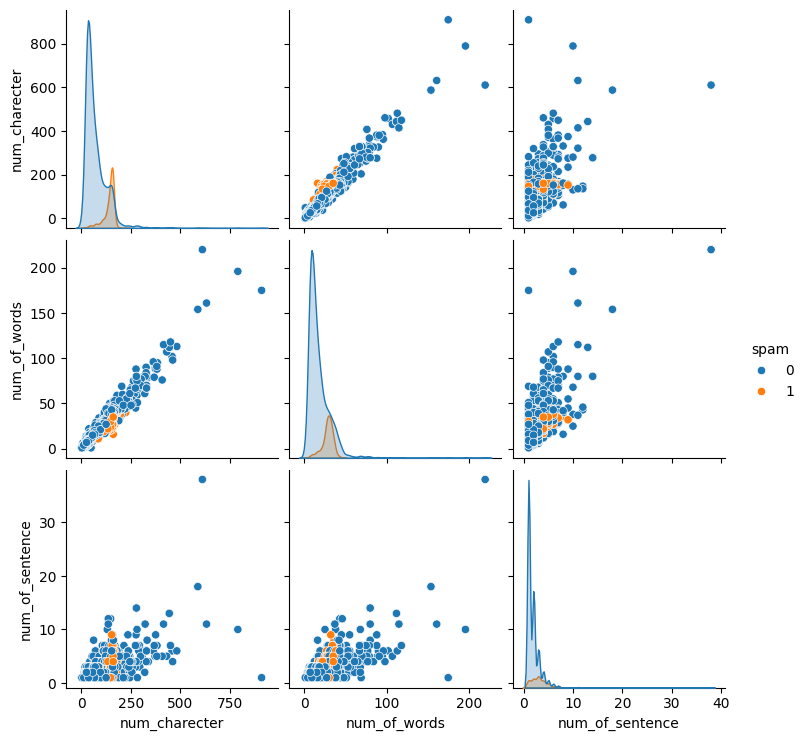

In [18]:
sns.pairplot(df,hue='spam')

<Axes: >

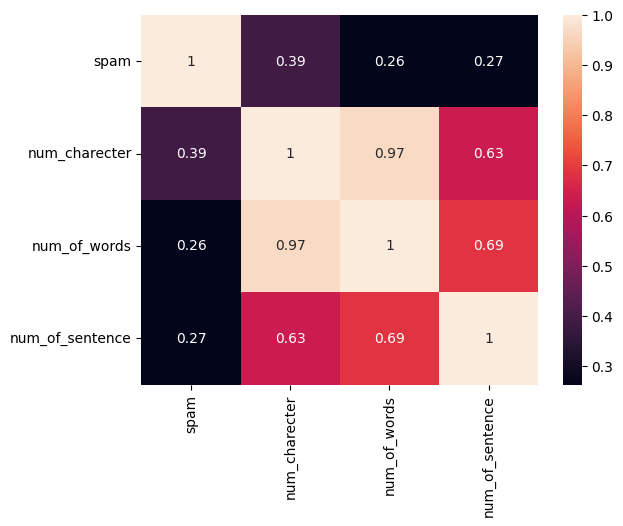

In [19]:
num_df = df.drop(columns=['v2'])
sns.heatmap(num_df.corr(),annot=True)


## Preprocessing the text 

##### Lower case the words

In [20]:
df['v2'] = df['v2'].apply(lambda x:x.lower())

##### Remove the html tags

In [21]:
import re
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'',text)

In [22]:
df['v2'] = df['v2'].apply(remove_html_tags)

#### Remove puntuations

In [23]:
import string
exclude = string.punctuation

In [24]:
def remove_punctuation(text):
    for char in exclude:
        text = text.replace(char,'')
    return text

In [25]:
df['v2'] = df['v2'].apply(remove_punctuation)

##### Handling the slang text

In [26]:
internet_slang = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you",
    "ILU": "I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "SK8": "Skate",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait",
    "7K": "Sick D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I do not care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can’t stop laughing"
}

In [27]:
def slangs_convert(text):
    word_text = []

    for word in text.split():
        if word.upper() in internet_slang:
            word_text.append(internet_slang[word.upper()])
        else:
            word_text.append(word)
    return " ".join(word_text)

In [28]:
df['v2'] = df['v2'].apply(slangs_convert)

In [29]:
df['v2'] = df['v2'].apply(lambda x: x.lower())

##### Remove stopwords from text

In [30]:
from nltk.corpus import stopwords
stopwords  = stopwords.words('english')

In [31]:
def remove_stopwords(text):
    word_text = []
    for word in text.split():
        if word not in stopwords:
            word_text.append(word)
    return " ".join(word_text)

In [32]:
df['v2'] = df['v2'].apply(remove_stopwords)

##### stemming of text

In [33]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def stem_word(word):
    return " ".join([ps.stem(w) for w in word.split()])

In [34]:
df['v2'] = df['v2'].apply(stem_word)

##### Remove Duplicate words

In [35]:
df.duplicated().sum()

405

In [36]:
df.drop_duplicates(inplace=True)

## Convert text to vectors
### 1. bag of words


In [37]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [38]:
df['spam'].shape

(5167,)

In [39]:
bow = cv.fit_transform(df['v2'])
df.reset_index(drop=True,inplace=True)
df_bow = pd.concat([pd.DataFrame(bow.toarray()),df],axis=1)

In [40]:
df_bow.drop(columns=['v2'],inplace=True)

In [41]:
df_bow.columns = df_bow.columns.astype(str)

### 2. Tf-Idf

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=4000)

In [43]:
TF = tfidf.fit_transform(df['v2'])


df.reset_index(drop=True,inplace=True)


df_tfidf = pd.concat([df,pd.DataFrame(TF.toarray())],axis=1)

In [44]:
df_tfidf.drop(columns=['v2'],inplace=True)

In [45]:
df_tfidf.columns = df_tfidf.columns.astype(str)

## Modeling

In [46]:
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score,cross_val_predict
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.naive_bayes import MultinomialNB

### Here we have imblanced data so we use the StratifiedKFold for unwanted biasness and model we use ensemble model because for imblanced data emsemble work better

In [47]:
X = df_tfidf.drop(columns=['spam'])
y = df_tfidf['spam']

#### Random Forest Model

The average accuracy score:  97.36805346205772
The average Precision score:  99.62789892696435


Text(0.5, 0, 'Number of Trees')

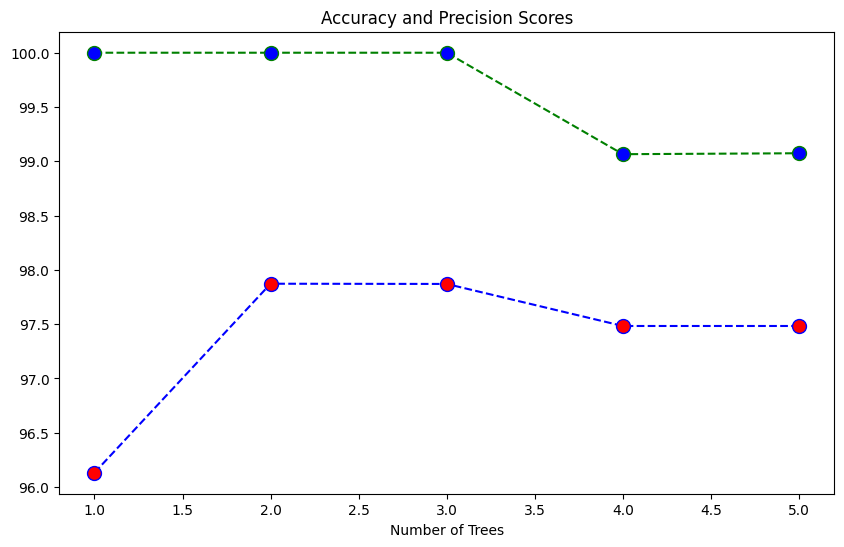

In [48]:
# StratifiedKFold 
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# random forest model
model = RandomForestClassifier()

accuracy = cross_val_score(model,X,y,cv=skf,scoring='accuracy')
precision = cross_val_score(model,X,y,cv=skf,scoring='precision')

accuracy = accuracy*100
precision = precision*100
print("The average accuracy score: ",accuracy.mean())
print("The average Precision score: ",precision.mean())


# Plot the result 
plt.figure(figsize=(10,6))
plt.plot(range(1,6),accuracy,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.plot(range(1,6),precision,color='green',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Accuracy and Precision Scores')
plt.xlabel('Number of Trees')

#### Extra Tree Classification

The average accuracy score:  97.60036774825348
The average Precision score:  98.36201930831086


Text(0.5, 0, 'Number of Trees')

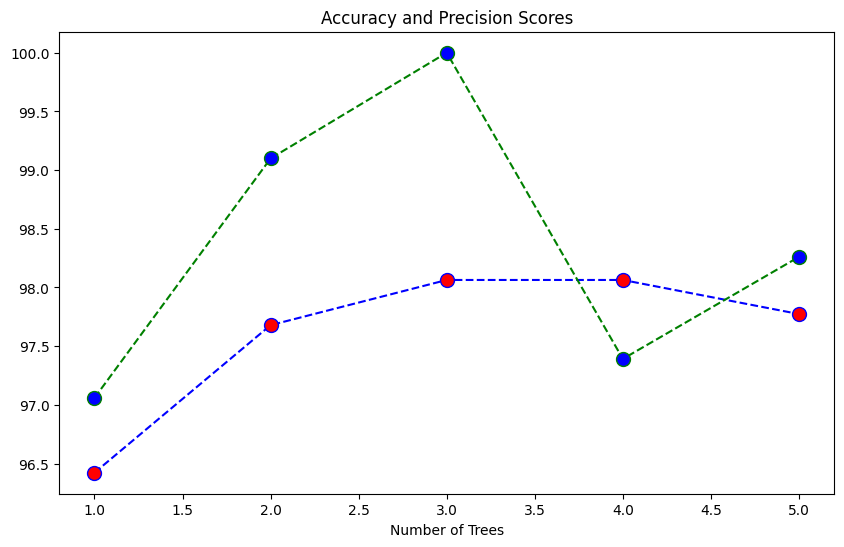

In [49]:
# StratifiedKFold 
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Extra Tree model
model = ExtraTreesClassifier()

accuracy = cross_val_score(model,X,y,cv=skf,scoring='accuracy')
precision = cross_val_score(model,X,y,cv=skf,scoring='precision')

accuracy = accuracy*100
precision = precision*100
print("The average accuracy score: ",accuracy.mean())
print("The average Precision score: ",precision.mean())


# Plot the result 
plt.figure(figsize=(10,6))
plt.plot(range(1,6),accuracy,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.plot(range(1,6),precision,color='green',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Accuracy and Precision Scores')
plt.xlabel('Number of Trees')

### MultinomialNB Model

The average accuracy score:  92.68469332154942
The average Precision score:  99.62962962962963


Text(0.5, 0, 'Number of Trees')

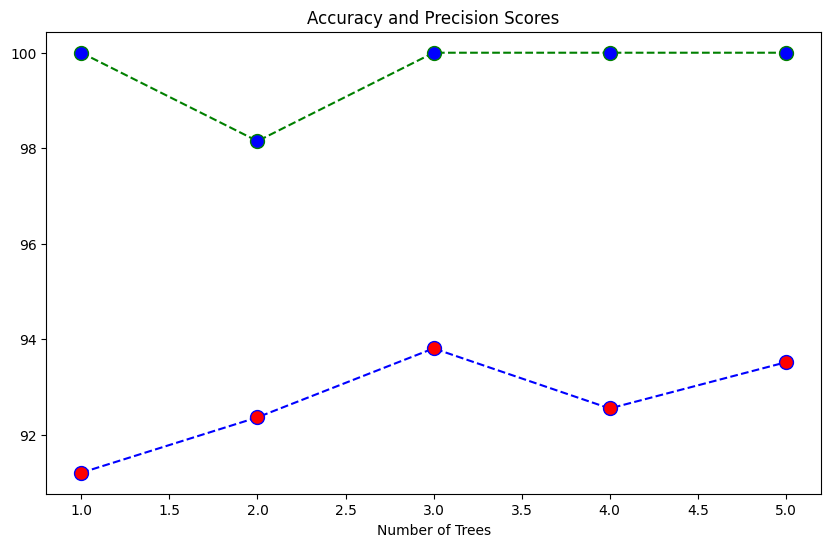

In [50]:
# StratifiedKFold 
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

model = MultinomialNB()

accuracy = cross_val_score(model,X,y,cv=skf,scoring='accuracy')
precision = cross_val_score(model,X,y,cv=skf,scoring='precision')

accuracy = accuracy*100
precision = precision*100
print("The average accuracy score: ",accuracy.mean())
print("The average Precision score: ",precision.mean())


# Plot the result 
plt.figure(figsize=(10,6))
plt.plot(range(1,6),accuracy,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.plot(range(1,6),precision,color='green',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Accuracy and Precision Scores')
plt.xlabel('Number of Trees')

#### we select the Ensemble model "Random Forest" because of its accuracy and precision scores and also we have imbalance data , for imbalance data emsemble model are better than other models